In [75]:
print("hello")

hello


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sympy as sym
from collections import Counter
from patsy import dmatrices
from scipy import linalg, stats
from scipy.integrate import quad
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW, ttest_ind
from sympy import *
from sympy. stats import *
from sympy.plotting import plot3d

In [71]:
#11.1
data = pd.DataFrame({
    'x1': [1,2,3,4], 'x2': [2,3,5,7], 'y':[3,6,3,6]
})
model = smf.ols('y ~ x1 + x2', data).fit()
print(model.summary2(alpha=0.05))

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -1.000 
Dependent Variable: y                AIC:                18.9734
Date:               2025-02-24 20:52 BIC:                17.1323
No. Observations:   4                Log-Likelihood:     -6.4867
Df Model:           2                F-statistic:        0.2500 
Df Residuals:       1                Prob (F-statistic): 0.816  
R-squared:          0.333            Scale:              6.0000 
-----------------------------------------------------------------
            Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   3.0000    3.0000   1.0000  0.5000  -35.1186   41.1186
x1          4.0000    7.6811   0.5208  0.6943  -93.5982  101.5982
x2         -2.0000    4.4721  -0.4472  0.7323  -58.8239   54.8239
----------------------------------------------------------------
Omnibus:              nan          D

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [72]:
model.predict({'x1': 1.5, 'x2': 4})

0    1.0
dtype: float64

In [73]:
#11.2
x1 = np.array([1,3,6,10]); y = np.array([7,1,6,14])
def L(b):
    e = y - (b[0] + b[1] * x1)
    return e @ e
minimize(L, x0=[0,0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 40.00000000000002
        x: [ 2.000e+00  1.000e+00]
      nit: 8
      jac: [-4.768e-07 -4.768e-07]
 hess_inv: [[ 3.969e-01 -5.435e-02]
            [-5.435e-02  1.088e-02]]
     nfev: 27
     njev: 9

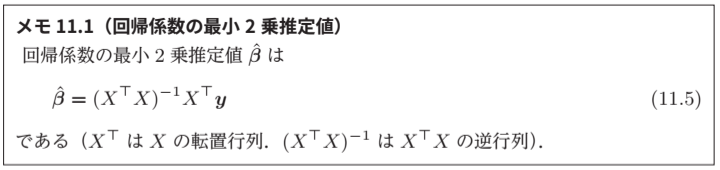

In [76]:
#11.6
data = pd.DataFrame({
    'x1': [1,1,2,3], 'x2': [2,3,5,7], 'y': [3,6,3,6]
})
y, X = dmatrices('y ~ x1 + x2', data)
linalg.inv(X.T @ X) @ X.T @ y

array([[ 3.],
       [-4.],
       [ 2.]])

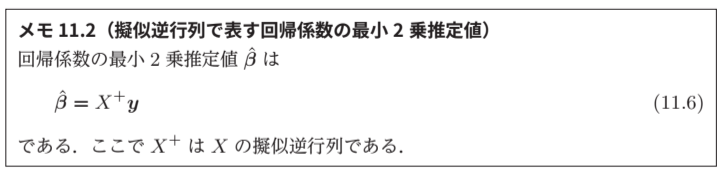

In [78]:
#11.7
linalg.pinv(X) @ y

array([[ 3.],
       [-4.],
       [ 2.]])

In [79]:
#11.8
data = pd.DataFrame({
    'x1': [1,1,2,3], 'x2': [2,3,5,7], 'y': [3,6,3,6]
})
model = smf.ols('y ~ x1 + x2', data).fit()
model.rsquared

0.3333333333333335

In [80]:
#11.9
model.rsquared_adj

-0.9999999999999996

In [81]:
#11.10
(np.allclose(eh.mean(), 0),
np.allclose(yh.mean(), data.y.mean()),
np.allclose(np.dot(g, g), np.dot(fh, fh)+np.dot(eh, eh)),
np.allclose(R2, np.dot(fh, fh)/np.dot(g,g)),
np.allclose(R2, np.corrcoef(y, yh)[0, 1] ** 2),
0 <= R2 <= 1,
np.allclose(np.corrcoef(y, yh), np.corrcoef(y,x1)))



NameError: name 'eh' is not defined

In [82]:
#11.11
data = pd.DataFrame({
    'x1': [1,1,2,3], 'x2': [2,3,5,7], 'y': [3,6,3,6]
})
model = smf.ols('y ~ x1 + x2', data).fit()
model.scale

5.999999999999998

In [83]:
#11.12
data = pd.DataFrame({
    'x1': [1,1,2,3], 'x2': [2,3,5,7], 'y': [3,6,3,6]
})
model = smf.ols('y ~ x1 + x2', data).fit()
model.f_pvalue

0.8164965809277261

In [84]:
#11.16
data = pd.DataFrame({'x1': [35, 45, 55, 65, 75],
                     'y': [114, 124, 143, 158, 166]})
model = smf.ols('y ~ x1', data).fit()
print(model.summary2(alpha=0.05))
model.conf_int(alpha=0.05)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.978   
Dependent Variable: y                AIC:                27.4080 
Date:               2025-02-25 21:54 BIC:                26.6269 
No. Observations:   5                Log-Likelihood:     -11.704 
Df Model:           1                F-statistic:        180.8   
Df Residuals:       3                Prob (F-statistic): 0.000889
R-squared:          0.984            Scale:              10.533  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     65.1000    5.8284  11.1695  0.0015  46.5515  83.6485
x1             1.3800    0.1026  13.4461  0.0009   1.0534   1.7066
-----------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:          2.423
Prob(Omnibus):        

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,0,1
Intercept,46.551497,83.648503
x1,1.053379,1.706621


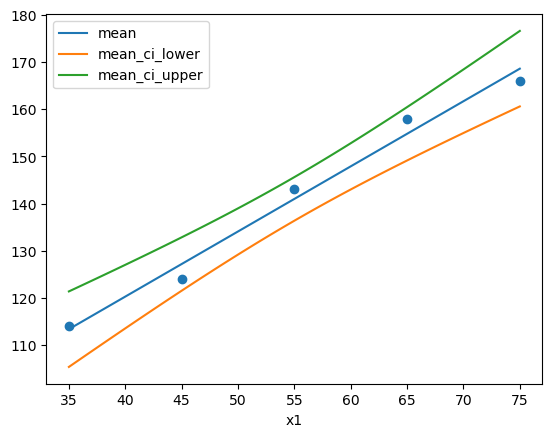

In [87]:
data = pd.DataFrame({'x1': [35, 45, 55, 65, 75],
'y': [114, 124, 143, 158, 166]})
model = smf.ols('y ~ x1', data).fit()
tmp = pd. DataFrame({'x1': np.linspace(35, 75, 100)})
ci = model.get_prediction(tmp).summary_frame(alpha=0.05)
df = ci[['mean', 'mean_ci_lower', 'mean_ci_upper']].assign(x1=tmp.x1)
_, ax = plt.subplots()
ax.scatter(data.x1, data.y)
df.plot(x='x1', ax=ax);

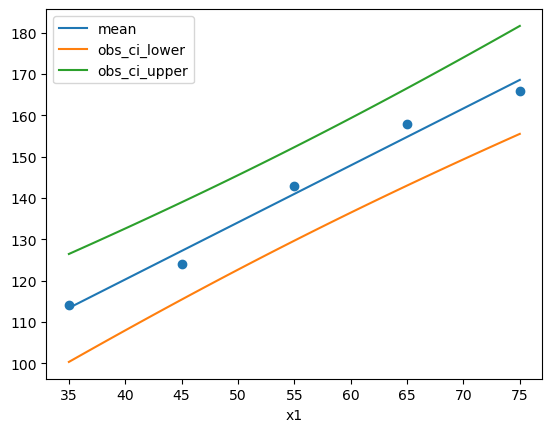

In [88]:
df = ci[['mean', 'obs_ci_lower', 'obs_ci_upper']].assign(x1=tmp.x1)
_, ax = plt. subplots()
ax.scatter(data.x1, data.y)
df.plot(x='x1', ax=ax);

<Axes: xlabel='x1', ylabel='y'>

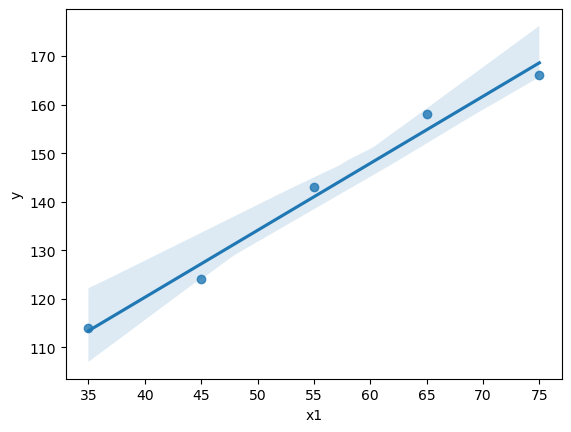

In [89]:
#11.22
sns.regplot(x=data.x1, y=data.y, ci=95)